EC9630 Machine Learning - LAboratory 2

Task : LINEAR REGRESSION

Name : Liyanage L.D.T.N.

Reg No: 2020/E/082

Date : 2024 / 07/ 19

Time : 08.00 a.m.

### **Download the dataset**
# References:
# Kaggle Learn - https://www.kaggle.com/learn
# Pandas Tutorial - https://pandas.pydata.org/docs/getting_started/intro_tutorials/


In [1]:
# Step : Download the dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
!unzip Bike-Sharing-Dataset.zip


--2024-07-25 06:08:52--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘Bike-Sharing-Dataset.zip’

Bike-Sharing-Datase     [  <=>               ] 273.43K  1.01MB/s    in 0.3s    

2024-07-25 06:08:52 (1.01 MB/s) - ‘Bike-Sharing-Dataset.zip’ saved [279992]

Archive:  Bike-Sharing-Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


## **Read the data as a CSV file**

In [2]:
import pandas as pd

# Step : Read the data
df = pd.read_csv('day.csv')
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## **Preprocessing**
# References:
# Data cleaning - https://www.kaggle.com/learn/data-cleaning

In [3]:
# Step : Preprocessing
# Check for missing values
print(df.isnull().sum())

# Convert categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['season', 'weathersit'])

# Drop unnecessary columns
df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


## **Split the Data**

In [5]:
from sklearn.model_selection import train_test_split

# Split the data
X = df.drop('cnt', axis=1)
y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Fit Linear Regression Model**
# References:
# Linear Regression Scikit-learn - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# Evaluation Score - https://scikit-learn.org/stable/modules/model_evaluation.html

In [6]:
from sklearn.linear_model import LinearRegression

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## **Calculate Errors**


In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict on test data
y_pred = model.predict(X_test)

# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


MAE: 0.3120796879071219
MSE: 0.17463177521162723
RMSE: 0.4178896687064987


## **Compare Actual vs Predicted Values**
# References:
# Data Visualization - https://www.kaggle.com/learn/data-visualization


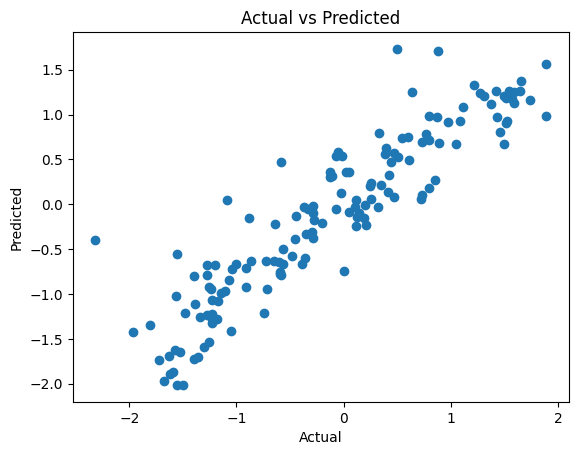

In [8]:
import matplotlib.pyplot as plt

# Compare actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


## **Implement Regularization**
# References:
# Regression - https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
# Evaluation Score - https://scikit-learn.org/stable/modules/model_evaluation.html


In [9]:
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f'Lasso MSE: {mse_lasso}')
print(f'Ridge MSE: {mse_ridge}')


Lasso MSE: 0.24008102790382765
Ridge MSE: 0.17338423072582856


### **Analyze the impact of regularization on model performance and coefficients.**

In [10]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Fit Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Fit Ridge regression model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Print MSE for Lasso and Ridge
print(f'Lasso MSE: {mse_lasso}')
print(f'Ridge MSE: {mse_ridge}')

# Compare coefficients
print(f'Linear Regression Coefficients: {model.coef_}')
print(f'Lasso Regression Coefficients: {lasso.coef_}')
print(f'Ridge Regression Coefficients: {ridge.coef_}')


Lasso MSE: 0.24008102790382765
Ridge MSE: 0.17338423072582856
Linear Regression Coefficients: [ 5.30922334e-01 -2.12603499e-02 -4.17838600e-02  7.21078386e-02
  3.66009295e-02  4.27087255e-01  7.06263188e-02 -7.66212077e-02
 -9.28234286e-02 -9.30255973e+11 -9.35372096e+11 -9.42021196e+11
 -9.25026985e+11  1.35200323e+13  1.32706133e+13  4.68660832e+12]
Lasso Regression Coefficients: [ 0.43592816  0.         -0.          0.          0.          0.05395207
  0.27481367 -0.         -0.00406872 -0.26384906  0.          0.
  0.          0.08265311 -0.         -0.06165527]
Ridge Regression Coefficients: [ 0.51612747 -0.02987371 -0.03710704  0.07354324  0.0345674   0.4184837
  0.0763692  -0.07488397 -0.09650969 -0.20677185  0.05693397 -0.02216466
  0.17294186  0.08451638 -0.04171908 -0.1256829 ]


---
## **Recursive Least Squares (SelfLearning)**
# References:
# Regression - https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
# Evaluation Score - https://scikit-learn.org/stable/modules/model_evaluation.html


In [11]:
#Implement and compare the Recursive Least Squares algorithm.
import numpy as np
from sklearn.metrics import mean_squared_error

# Recursive Least Squares (RLS) function
def recursive_least_squares(X, y, lambda_factor=1.0):
    n_features = X.shape[1]
    P = np.eye(n_features) * 1000  # Large initial value
    theta = np.zeros(n_features)

    for i in range(len(y)):
        x_i = X[i, :].reshape(-1, 1)
        y_i = y[i]

        K = P @ x_i / (lambda_factor + x_i.T @ P @ x_i)
        theta = theta + K.flatten() * (y_i - x_i.T @ theta)
        P = (P - K @ x_i.T @ P) / lambda_factor

    return theta

# Prepare the training data
X_train_with_intercept = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
y_train_np = y_train.values

# Fit the RLS model
theta_rls = recursive_least_squares(X_train_with_intercept, y_train_np)

# Prepare the test data
X_test_with_intercept = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Predict using the RLS model
y_pred_rls = X_test_with_intercept @ theta_rls

# Calculate Mean Squared Error for RLS
mse_rls = mean_squared_error(y_test, y_pred_rls)
print(f'RLS MSE: {mse_rls}')


RLS MSE: 0.17340567092786865


## **Compare the performance of RLS with the traditional linear regression model.( Self Learning )**

In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Recursive Least Squares (RLS) function
def recursive_least_squares(X, y, lambda_factor=1.0):
    n_features = X.shape[1]
    P = np.eye(n_features) * 1000  # Large initial value
    theta = np.zeros(n_features)

    for i in range(len(y)):
        x_i = X[i, :].reshape(-1, 1)
        y_i = y[i]

        K = P @ x_i / (lambda_factor + x_i.T @ P @ x_i)
        theta = theta + K.flatten() * (y_i - x_i.T @ theta)
        P = (P - K @ x_i.T @ P) / lambda_factor

    return theta

# Prepare the training data
X_train_with_intercept = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
y_train_np = y_train.values

# Fit the RLS model
theta_rls = recursive_least_squares(X_train_with_intercept, y_train_np)

# Prepare the test data
X_test_with_intercept = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Predict using the RLS model
y_pred_rls = X_test_with_intercept @ theta_rls

# Calculate Mean Squared Error for RLS
mse_rls = mean_squared_error(y_test, y_pred_rls)
print(f'RLS MSE: {mse_rls}')

# Compare with traditional linear regression
mse_lr = mean_squared_error(y_test, y_pred)
print(f'Traditional Linear Regression MSE: {mse_lr}')


RLS MSE: 0.17340567092786865
Traditional Linear Regression MSE: 0.17463177521162723


## **Gradient Descent (Self Learning)**

In [ ]:
# Import necessary library
from sklearn.linear_model import SGDRegressor

# Implement Gradient Descent
sgd = SGDRegressor(max_iter=1000, tol=1e-3)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)

print(f'SGD MSE: {mse_sgd}')


SGD MSE: 0.17127480964373695
